<a href="https://colab.research.google.com/github/vanaja-penumatsa-dev/kaggle-dont-get-kicked/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DPATH = '/content/drive/MyDrive/apporchid/data/'

In [ ]:
import pandas as pd

train = pd.read_csv(DPATH+'train_orig.csv')
test = pd.read_csv(DPATH+'test_orig.csv')

In [ ]:
train.shape, test.shape

((72983, 34), (48707, 33))



*   Decent amount of data

In [ ]:
train['IsBadBuy'].value_counts()

0    64007
1     8976
Name: IsBadBuy, dtype: int64

In [ ]:
64007/72983, 8976/72983

(0.8770124549552636, 0.12298754504473644)

**Observation**

*   Highy imbalanced dataset
*   Any model must perform better than a random model with accuracy 87%.

In [ ]:
train.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [ ]:
test.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920


In [ ]:
cat_cols = ['Auction', 'VehYear', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'WheelType', \
              'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'IsOnlineSale']
num_cols = ['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', \
                'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', \
                'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VehBCost', 'WarrantyCost']

In [ ]:
len(cat_cols) + len(num_cols)
#other variables are RefId, IsBadBuy, PurchDate	

31

<h1>1. Data Cleaning</h1>

<h2>1a.Check for null values</h2>

In [ ]:
train.isna().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [ ]:
test.isna().sum()

RefId                                    0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1550
SubModel                                 5
Color                                    4
Transmission                             3
WheelTypeID                           2188
WheelType                             2188
VehOdo                                   0
Nationality                              7
Size                                     7
TopThreeAmericanName                     7
MMRAcquisitionAuctionAveragePrice       10
MMRAcquisitionAuctionCleanPrice         10
MMRAcquisitionRetailAveragePrice        10
MMRAcquisitonRetailCleanPrice           10
MMRCurrentAuctionAveragePrice          143
MMRCurrentAuctionCleanPrice            143
MMRCurrentR



*   Replacing categorical column NaNs with mode
*   Replacing numerical column NaNs with mean
*   No rows for AUCGUART=Yellow both in test and train, and the mode is Green, I think it is not right to replace NaN values with Green for this particular feature as Green mean Guaranteed/arbitratable, So, I am adding value 'Other' in place of NaNs






In [ ]:
def data_cleaning(df):
  
  df['AUCGUART'].fillna('Other', inplace=True)
  for column in cat_cols:
      df[column].fillna(df[column].mode()[0], inplace=True)
      
  for column in num_cols:
      df[column].fillna(df[column].mean(), inplace=True)
  return df

In [ ]:
train = data_cleaning(train)

In [ ]:
train.isna().sum()

RefId                                0
IsBadBuy                             0
PurchDate                            0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelTypeID                          0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPric

<h1>2. Visualisation</h1>

<h2>2a. Numerical features</h2>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

VehicleAge


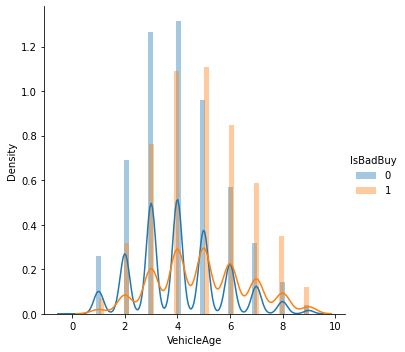

VehOdo


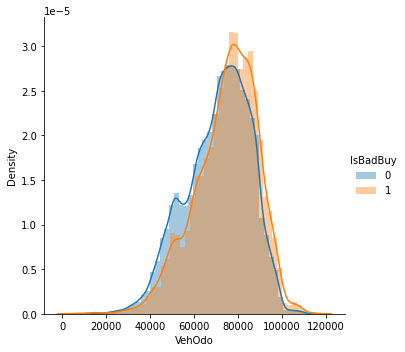

MMRAcquisitionAuctionAveragePrice


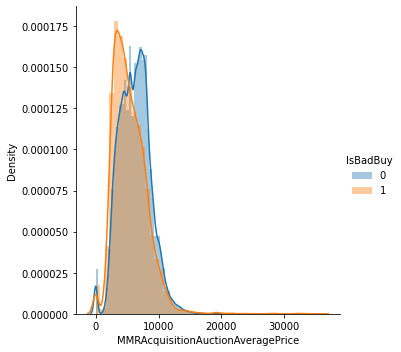

MMRAcquisitionAuctionCleanPrice


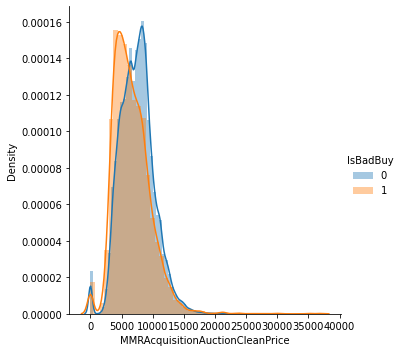

MMRAcquisitionRetailAveragePrice


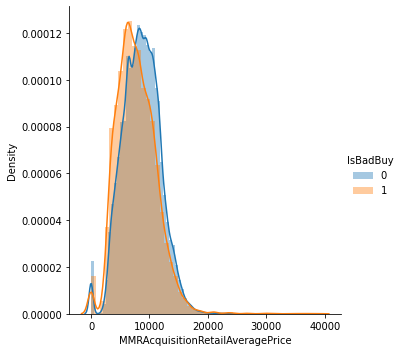

MMRAcquisitonRetailCleanPrice


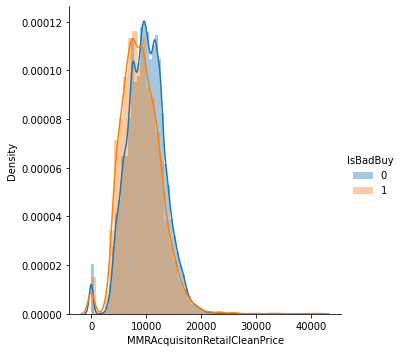

MMRCurrentAuctionAveragePrice


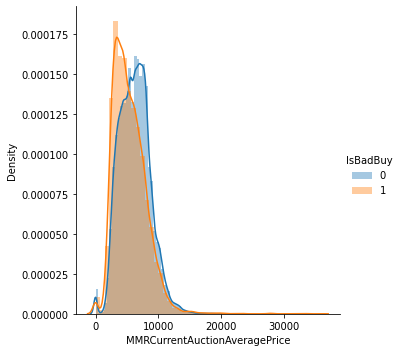

MMRCurrentAuctionCleanPrice


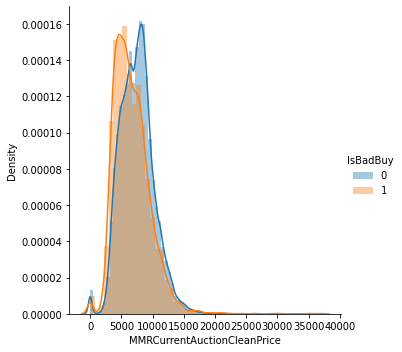

MMRCurrentRetailAveragePrice


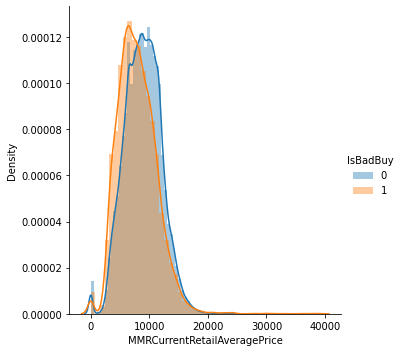

MMRCurrentRetailCleanPrice


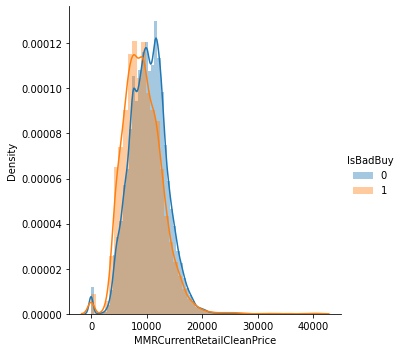

VehBCost


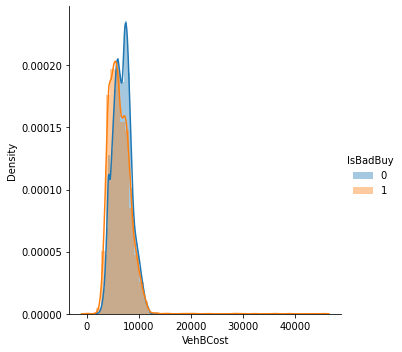

WarrantyCost


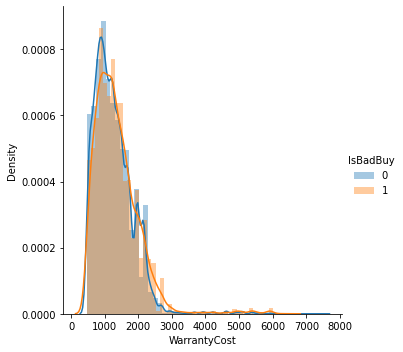

In [ ]:
for col in num_cols:
  print(col)
  sns.FacetGrid(train, hue="IsBadBuy", size=5) \
    .map(sns.distplot, col) \
    .add_legend();
  plt.savefig(DPATH+'/plots/'+col+'.png')
  plt.show();

**Obv:**


*   We can see that the data for target variable is mostly overlapping for almost all numerical features.
*   Though there is a very slight difference in the price columns
*   Overlap means the respective features might not help in differentiating GoodBuy from BadBuy.

PS: If plots are not loaded here, please check plots folder.





<h2> 2b. Categorical features</h2>



*   Let's see how many values each cateforical column has




In [ ]:
for col in cat_cols:
  print(col, train[col].value_counts().shape)

Auction (3,)
VehYear (10,)
Make (33,)
Model (1063,)
Trim (134,)
SubModel (863,)
Color (16,)
Transmission (3,)
WheelTypeID (4,)
WheelType (3,)
Nationality (4,)
Size (12,)
TopThreeAmericanName (4,)
PRIMEUNIT (2,)
AUCGUART (3,)
BYRNO (74,)
VNZIP1 (153,)
VNST (37,)
IsOnlineSale (2,)


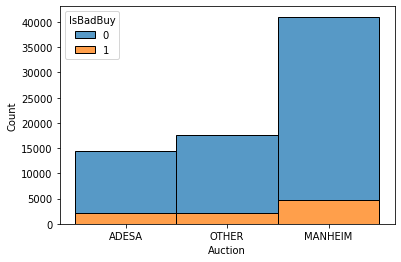

MANHEIM    41043
OTHER      17501
ADESA      14439
Name: Auction, dtype: int64
value:  ADESA bad_buy%:  0.15188032412216912 good_buy%:  0.8481196758778309
value:  OTHER bad_buy%:  0.1181646763042112 good_buy%:  0.8818353236957888
value:  MANHEIM bad_buy%:  0.1148795166045367 good_buy%:  0.8851204833954633


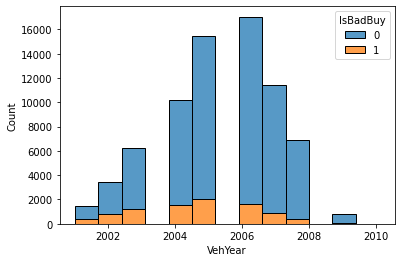

2006    17043
2005    15489
2007    11423
2004    10207
2008     6885
2003     6227
2002     3405
2001     1481
2009      822
2010        1
Name: VehYear, dtype: int64
value:  2006 bad_buy%:  0.0938801854133662 good_buy%:  0.9061198145866338
value:  2004 bad_buy%:  0.15548153228176742 good_buy%:  0.8445184677182326
value:  2005 bad_buy%:  0.13118987668668086 good_buy%:  0.8688101233133192
value:  2007 bad_buy%:  0.07773789722489714 good_buy%:  0.9222621027751029
value:  2001 bad_buy%:  0.28764348413234303 good_buy%:  0.712356515867657
value:  2003 bad_buy%:  0.19431507949253252 good_buy%:  0.8056849205074674
value:  2002 bad_buy%:  0.24023494860499267 good_buy%:  0.7597650513950074
value:  2008 bad_buy%:  0.05591866376180102 good_buy%:  0.944081336238199
value:  2009 bad_buy%:  0.0364963503649635 good_buy%:  0.9635036496350365
value:  2010 bad_buy%:  0.0 good_buy%:  1.0


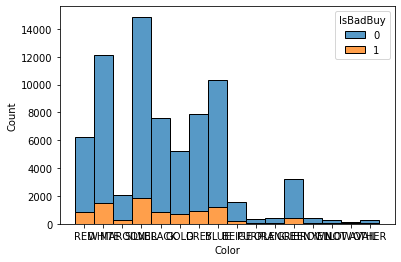

SILVER       14883
WHITE        12123
BLUE         10347
GREY          7887
BLACK         7627
RED           6257
GOLD          5231
GREEN         3194
MAROON        2046
BEIGE         1584
BROWN          436
ORANGE         415
PURPLE         373
YELLOW         244
OTHER          242
NOT AVAIL       94
Name: Color, dtype: int64
value:  RED bad_buy%:  0.13185232539555697 good_buy%:  0.868147674604443
value:  WHITE bad_buy%:  0.12422667656520663 good_buy%:  0.8757733234347934
value:  MAROON bad_buy%:  0.1270772238514174 good_buy%:  0.8729227761485826
value:  SILVER bad_buy%:  0.12389975139420815 good_buy%:  0.8761002486057918
value:  BLACK bad_buy%:  0.11249508325685066 good_buy%:  0.8875049167431494
value:  GOLD bad_buy%:  0.14089084305104185 good_buy%:  0.8591091569489582
value:  GREY bad_buy%:  0.11550652973247115 good_buy%:  0.8844934702675289
value:  BLUE bad_buy%:  0.11491253503430947 good_buy%:  0.8850874649656906
value:  BEIGE bad_buy%:  0.13320707070707072 good_buy%:  0.86679292

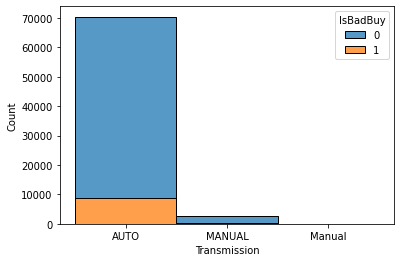

AUTO      70407
MANUAL     2575
Manual        1
Name: Transmission, dtype: int64
value:  AUTO bad_buy%:  0.12324058687346429 good_buy%:  0.8767594131265357
value:  MANUAL bad_buy%:  0.11611650485436893 good_buy%:  0.883883495145631
value:  Manual bad_buy%:  0.0 good_buy%:  1.0


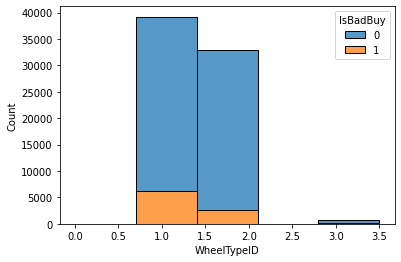

1.0    39219
2.0    33004
3.0      755
0.0        5
Name: WheelTypeID, dtype: int64
value:  1.0 bad_buy%:  0.1586220964328514 good_buy%:  0.8413779035671486
value:  2.0 bad_buy%:  0.08044479457035511 good_buy%:  0.9195552054296449
value:  3.0 bad_buy%:  0.13112582781456952 good_buy%:  0.8688741721854305
value:  0.0 bad_buy%:  0.2 good_buy%:  0.8


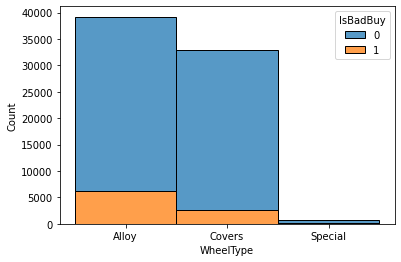

Alloy      39224
Covers     33004
Special      755
Name: WheelType, dtype: int64
value:  Alloy bad_buy%:  0.15862737099734855 good_buy%:  0.8413726290026514
value:  Covers bad_buy%:  0.08044479457035511 good_buy%:  0.9195552054296449
value:  Special bad_buy%:  0.13112582781456952 good_buy%:  0.8688741721854305


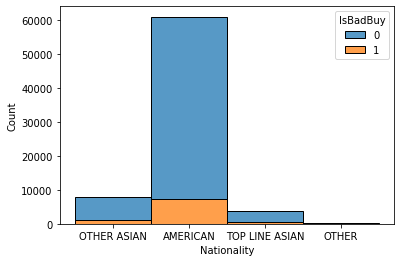

AMERICAN          61033
OTHER ASIAN        8033
TOP LINE ASIAN     3722
OTHER               195
Name: Nationality, dtype: int64
value:  OTHER ASIAN bad_buy%:  0.13208016930163077 good_buy%:  0.8679198306983692
value:  AMERICAN bad_buy%:  0.12103288384972065 good_buy%:  0.8789671161502793
value:  TOP LINE ASIAN bad_buy%:  0.13460505104782375 good_buy%:  0.8653949489521763
value:  OTHER bad_buy%:  0.13846153846153847 good_buy%:  0.8615384615384616


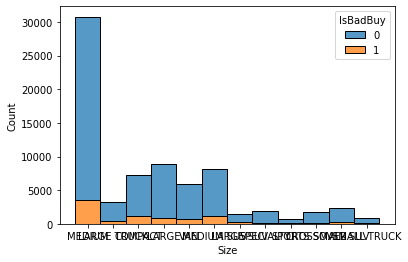

MEDIUM         30790
LARGE           8850
MEDIUM SUV      8090
COMPACT         7205
VAN             5854
LARGE TRUCK     3170
SMALL SUV       2276
SPECIALTY       1915
CROSSOVER       1759
LARGE SUV       1433
SMALL TRUCK      864
SPORTS           777
Name: Size, dtype: int64
value:  MEDIUM bad_buy%:  0.11500487171159467 good_buy%:  0.8849951282884053
value:  LARGE TRUCK bad_buy%:  0.11356466876971609 good_buy%:  0.886435331230284
value:  COMPACT bad_buy%:  0.1589174184594032 good_buy%:  0.8410825815405968
value:  LARGE bad_buy%:  0.09242937853107344 good_buy%:  0.9075706214689265
value:  VAN bad_buy%:  0.12743423300307483 good_buy%:  0.8725657669969251
value:  MEDIUM SUV bad_buy%:  0.14746600741656365 good_buy%:  0.8525339925834363
value:  LARGE SUV bad_buy%:  0.16189811584089323 good_buy%:  0.8381018841591068
value:  SPECIALTY bad_buy%:  0.09190600522193211 good_buy%:  0.9080939947780678
value:  SPORTS bad_buy%:  0.18532818532818532 good_buy%:  0.8146718146718147
value:  CROSSOVER ba

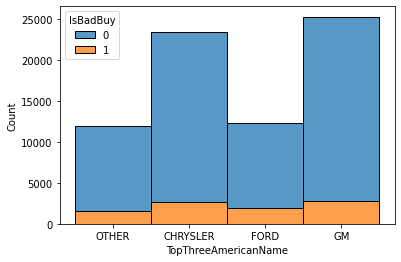

GM          25319
CHRYSLER    23399
FORD        12315
OTHER       11950
Name: TopThreeAmericanName, dtype: int64
value:  OTHER bad_buy%:  0.13297071129707114 good_buy%:  0.8670292887029288
value:  CHRYSLER bad_buy%:  0.11645796828924312 good_buy%:  0.8835420317107568
value:  FORD bad_buy%:  0.156394640682095 good_buy%:  0.843605359317905
value:  GM bad_buy%:  0.10806113985544452 good_buy%:  0.8919388601445555


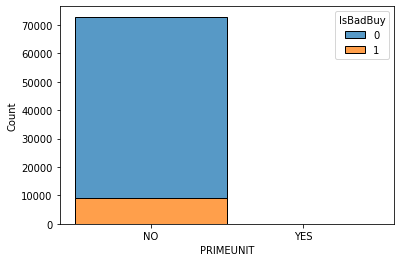

NO     72921
YES       62
Name: PRIMEUNIT, dtype: int64
value:  NO bad_buy%:  0.12300983255852224 good_buy%:  0.8769901674414777
value:  YES bad_buy%:  0.0967741935483871 good_buy%:  0.9032258064516129


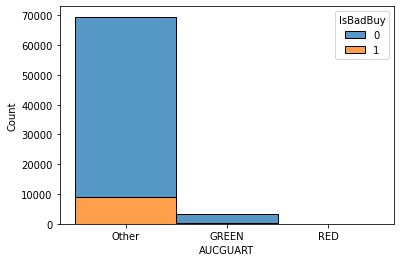

Other    69564
GREEN     3340
RED         79
Name: AUCGUART, dtype: int64
value:  Other bad_buy%:  0.1271203496061181 good_buy%:  0.8728796503938819
value:  GREEN bad_buy%:  0.0374251497005988 good_buy%:  0.9625748502994012
value:  RED bad_buy%:  0.10126582278481013 good_buy%:  0.8987341772151899


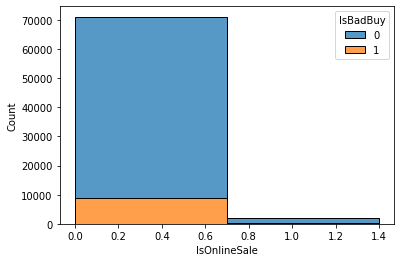

0    71138
1     1845
Name: IsOnlineSale, dtype: int64
value:  0 bad_buy%:  0.12318310888695212 good_buy%:  0.8768168911130478
value:  1 bad_buy%:  0.11544715447154472 good_buy%:  0.8845528455284553


In [ ]:
cat_cols_few = ['Auction', 'VehYear', 'Color', 'Transmission', 'WheelTypeID', 'WheelType', 'Nationality', 'Size', \
             'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'IsOnlineSale']
for col in cat_cols_few:
  sns.histplot(binwidth=0.7, x=col, hue="IsBadBuy", data=train, stat="count", multiple="stack")
  plt.savefig(DPATH+'/plots/'+col+'.png')
  plt.show()

  print(train[col].value_counts())
  for value in train[col].unique():
    df_value = train[train[col] == value]
    length = df_value.shape[0]
    bad_buy_perc = df_value[df_value['IsBadBuy']==1].shape[0]/length
    print("value: ",value,"bad_buy%: ", bad_buy_perc, "good_buy%: ", 1-bad_buy_perc)

**Observation:**


*   Few categorical variable has too many values(Model, SubModel, etc.,)
*   Like numerical features categorical feature values are also mostly **skewly distributed** like how whole dataset is.(observe percentages) except for AUCGUART(=Green)

*   There is only one row for **VehYear**(=2010).
*   Two definitions for same value for column **Transmission**(MANUAL,Manual)
*   Missing data for PRIMEUNIT, which could have been an important feature as we can see 90% of Prime units are a good buy.
*   No values for AUCGUART=Yellow both in test and train




PS: If plots are not loaded here, please check plots folder.


In [ ]:
test['VehYear'].value_counts()

2006    11325
2005    10172
2007     8286
2004     6710
2008     4165
2003     4162
2002     2338
2001     1050
2009      491
2010        8
Name: VehYear, dtype: int64



*   Since, there are few rows for VehYear=2010 in test dataset, I am leaving that row as is in the train dataset




In [ ]:
test['Transmission'].value_counts()

AUTO      47010
MANUAL     1694
Name: Transmission, dtype: int64

In [ ]:
train.loc[train.Transmission == 'Manual', 'Transmission'] = 'MANUAL'

In [ ]:
train['Transmission'].value_counts()

AUTO      70407
MANUAL     2576
Name: Transmission, dtype: int64

<h2>2b.1 Remaining categorical features</h2>



*   Let's observe MAKE feature




In [ ]:
print(train['Make'].value_counts())
for value in train['Make'].unique():
  df_value = train[train['Make'] == value]
  length = df_value.shape[0]
  print("\Manufacturer: ", value, "#rows:",length)
  bad_buy_perc = df_value[df_value['IsBadBuy']==1].shape[0]/length
  print("value: ",value,"bad_buy%: ", bad_buy_perc, "good_buy%: ", 1-bad_buy_perc)

CHEVROLET       17248
DODGE           12912
FORD            11305
CHRYSLER         8844
PONTIAC          4258
KIA              2484
SATURN           2163
NISSAN           2085
HYUNDAI          1811
JEEP             1644
SUZUKI           1328
TOYOTA           1144
MITSUBISHI       1030
MAZDA             979
MERCURY           913
BUICK             720
GMC               649
HONDA             497
OLDSMOBILE        243
VOLKSWAGEN        134
ISUZU             134
SCION             129
LINCOLN            97
INFINITI           42
VOLVO              37
CADILLAC           33
ACURA              33
LEXUS              31
SUBARU             28
MINI               24
PLYMOUTH            2
TOYOTA SCION        1
HUMMER              1
Name: Make, dtype: int64
\Manufacturer:  MAZDA #rows: 979
value:  MAZDA bad_buy%:  0.16138917262512767 good_buy%:  0.8386108273748724
\Manufacturer:  DODGE #rows: 12912
value:  DODGE bad_buy%:  0.10323729863692689 good_buy%:  0.8967627013630731
\Manufacturer:  FORD #rows: 1

<h2>VNST analysis</h2>

In [ ]:
print(train['VNST'].value_counts())
for value in train['VNST'].unique():
  df_value = train[train['VNST'] == value]
  length = df_value.shape[0]
  print("\nstate: ", value, "#rows:",length)
  bad_buy_perc = df_value[df_value['IsBadBuy']==1].shape[0]/length
  print("value: ",value,"bad_buy%: ", bad_buy_perc, "good_buy%: ", 1-bad_buy_perc)

TX    13596
FL    10447
CA     7095
NC     7042
AZ     6174
CO     4998
SC     4280
OK     3594
GA     2450
TN     1764
VA     1662
MD     1158
UT      875
PA      847
OH      795
MO      758
AL      690
NV      562
IA      499
MS      493
IN      486
IL      458
LA      349
NJ      317
WV      292
NM      239
KY      230
OR      211
ID      196
WA      136
NH       97
AR       70
MN       62
NE       26
MA       15
MI       14
NY        6
Name: VNST, dtype: int64

state:  FL #rows: 10447
value:  FL bad_buy%:  0.10931367856800996 good_buy%:  0.89068632143199

state:  VA #rows: 1662
value:  VA bad_buy%:  0.1582430806257521 good_buy%:  0.8417569193742479

state:  IA #rows: 499
value:  IA bad_buy%:  0.1462925851703407 good_buy%:  0.8537074148296593

state:  AR #rows: 70
value:  AR bad_buy%:  0.22857142857142856 good_buy%:  0.7714285714285715

state:  MN #rows: 62
value:  MN bad_buy%:  0.03225806451612903 good_buy%:  0.967741935483871

state:  TN #rows: 1764
value:  TN bad_buy%:  0.1150793

**Observation:**


*   Too many values for few features.
*   and for each such feature,  many values has fewer rows.
*   and no value is highly distinguishing a good buy from bad buy





<h1>3. Derived features</h1>




*   **KickDate, AcquisitionType** are missing in the data, from which few valuable insights can be derived.
*   List item







<h3>Let's do some analysis on the price columns</h3>

In [ ]:
train[train.MMRAcquisitionAuctionAveragePrice > train.MMRAcquisitionRetailAveragePrice]['IsBadBuy'].value_counts()

Series([], Name: IsBadBuy, dtype: int64)

In [ ]:
train[train.MMRAcquisitionAuctionCleanPrice > train.MMRAcquisitonRetailCleanPrice].value_counts()

RefId  IsBadBuy  PurchDate  Auction  VehYear  VehicleAge  Make       Model                 Trim  SubModel             Color   Transmission  WheelTypeID  WheelType  VehOdo  Nationality  Size         TopThreeAmericanName  MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  MMRCurrentRetailCleanPrice  PRIMEUNIT  AUCGUART  BYRNO  VNZIP1  VNST  VehBCost  IsOnlineSale  WarrantyCost
72508  0         2/25/2009  ADESA    2007     2           CHEVROLET  UPLANDER FWD V6 3.9L  LS    PASSENGER EXT 3.5L   SILVER  AUTO          1.0          Alloy      64665   AMERICAN     VAN          GM                    0.0                                1.0                              0.0                               0.0                            0.0                            1.0                          0.0                           0.0    



*   We can see few entries has MMRAcquisitionAuctionAveragePrice = 0.0, must be a data anamoly



In [ ]:
print(train[train.MMRAcquisitionAuctionAveragePrice <= 0.0].shape)
print(train[train.MMRAcquisitionAuctionAveragePrice <= 1.0].shape)

(828, 34)
(828, 34)


In [ ]:
print(train[train.MMRAcquisitionAuctionCleanPrice <= 0.0].shape)
print(train[train.MMRAcquisitionAuctionCleanPrice <= 1.0].shape)

(697, 34)
(828, 34)


In [ ]:
print(train[train.MMRAcquisitionRetailAveragePrice <= 0.0].shape)
print(train[train.MMRAcquisitionRetailAveragePrice <= 1.0].shape)

(828, 34)
(828, 34)


In [ ]:
print(train[train.MMRAcquisitonRetailCleanPrice <= 0.0].shape)
print(train[train.MMRAcquisitonRetailCleanPrice <= 1.0].shape)

(828, 34)
(828, 34)


In [ ]:
print(train[train.MMRCurrentAuctionAveragePrice <= 0.0].shape)
print(train[train.MMRCurrentAuctionAveragePrice <= 1.0].shape)

(504, 34)
(504, 34)


In [ ]:
print(train[train.MMRCurrentAuctionCleanPrice <= 0.0].shape)
print(train[train.MMRCurrentAuctionCleanPrice <= 1.0].shape)

(378, 34)
(504, 34)


In [ ]:
print(train[train.MMRCurrentRetailAveragePrice <= 0.0].shape)
print(train[train.MMRCurrentRetailAveragePrice <= 1.0].shape)

(504, 34)
(504, 34)


In [ ]:
print(train[train.MMRCurrentRetailCleanPrice <= 0.0].shape)
print(train[train.MMRCurrentRetailCleanPrice <= 1.0].shape)

(504, 34)
(504, 34)


In [ ]:
print(train[train.VehBCost <= 0.0].shape)
print(train[train.VehBCost <= 1.0].shape)

(0, 34)
(1, 34)


In [ ]:
print(train[train.WarrantyCost <= 0.0].shape)
print(train[train.WarrantyCost <= 1.0].shape)

(0, 34)
(0, 34)


In [ ]:
print(train[train.VehOdo <= 0.0].shape)
print(train[train.VehOdo <= 100.0].shape)

(0, 34)
(0, 34)


Observation

*   Clearly price 0 or 1 is an anomaly, and we need process to them, replacing them with their mean.
*   Test data also seems to have it.

In [ ]:
print(test[test.MMRAcquisitionAuctionAveragePrice <= 0.0].shape)
print(test[test.MMRAcquisitionAuctionAveragePrice <= 1.0].shape)

(489, 33)
(489, 33)


In [ ]:
def data_cleaning_price(df):

  price_cols = list(set(num_cols) - set(['VehicleAge', 'VehOdo']))   
  for column in price_cols:
      df[column].replace(0.0, df[column].mean(), inplace=True)
      df[column].replace(1.0, df[column].mean(), inplace=True)
  return df

In [ ]:
train = data_cleaning_price(train)

In [ ]:
print(train[train.MMRAcquisitionAuctionAveragePrice <= 0.0].shape)
print(train[train.MMRAcquisitionAuctionAveragePrice <= 1.0].shape)

(0, 34)
(0, 34)


<h1>Derived feature1</h1>



*   From, Acquisition cost paid for the vehicle at time of purchase(VehBCost), and Acquisition, avg, clean prices we can derive whether a purchased vehicle **below average/average/above average** in terms of quality.



In [ ]:
def quality(row):
    
    if row['VehBCost'] < row['MMRAcquisitionAuctionAveragePrice']:
      return 'Below Avg'
    elif row['VehBCost'] >= row['MMRAcquisitionAuctionAveragePrice'] and \
        row['VehBCost'] < row['MMRAcquisitionAuctionCleanPrice']:
      return 'Avg'
    else:
      return 'Above Avg'

In [ ]:
train['quality'] = train.apply (lambda row: quality(row), axis=1)

In [ ]:
train['quality'].value_counts()

Avg          25354
Above Avg    23832
Below Avg    23797
Name: quality, dtype: int64

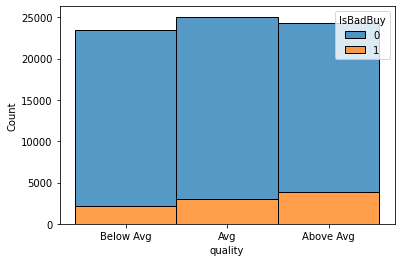

value:  Below Avg bad_buy%:  0.09042598418501828 good_buy%:  0.9095740158149818
value:  Avg bad_buy%:  0.11981658692185009 good_buy%:  0.88018341307815
value:  Above Avg bad_buy%:  0.15767668895360762 good_buy%:  0.8423233110463924


In [ ]:
sns.histplot(binwidth=0.7, x='quality', hue="IsBadBuy", data=train, stat="count", multiple="stack")
plt.savefig(DPATH+'/plots/'+col+'.png')
plt.show()

for value in train['quality'].unique():
    df_value = train[train['quality'] == value]
    length = df_value.shape[0]
    bad_buy_perc = df_value[df_value['IsBadBuy']==1].shape[0]/length
    print("value: ",value,"bad_buy%: ", bad_buy_perc, "good_buy%: ", 1-bad_buy_perc)

**Observation**

*   As expected, above average vehicles have higher probability to be good buy.
*   data is almost equally distributed.
*   Could a valuable feature





<h2>Let's observe date column - PurchDate, VehYear and VehicleAge</h2>


*   From a high-level observation, it seems that VehicleAge = PurchDate - VehYear, let's test it.
*   And for few rows VehicleAge = 0, may be they were auctioned on the same year, let's check.



In [ ]:
import datetime

train['PurchDate'] = pd.to_datetime(train['PurchDate'], errors='coerce')
(train['VehicleAge'] == train['PurchDate'].dt.year - train['VehYear']).value_counts()

True     72976
False        7
dtype: int64

In [ ]:
train[train['VehicleAge'] != train['PurchDate'].dt.year - train['VehYear']][['RefId', 'PurchDate', 'VehYear', 'VehicleAge', 'IsBadBuy']]

,RefId,PurchDate,VehYear,VehicleAge,IsBadBuy
7408,7415,2009-11-30,2005,5,0
11109,11118,2009-12-31,2006,4,0
37426,37449,2009-11-03,2006,4,1
41496,41519,2009-12-21,2005,5,0
43187,43211,2009-12-30,2006,4,0
57641,57669,2009-08-26,2003,7,0
67666,67698,2009-12-15,2007,3,0


In [ ]:
#53024, 60223

train[train.RefId==53024]

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
52996,53024,0,9/1/2010,MANHEIM,2007,3,MITSUBISHI,GALANT 4C,ES,4D SEDAN,SILVER,AUTO,2.0,Covers,60413,OTHER ASIAN,MEDIUM,OTHER,7108.0,8352.0,10654.0,11733.0,7763.0,8815.0,11165.0,12166.0,NaN,NaN,18111,37122,TN,7380.0,0,533


In [ ]:
train[train.RefId==60223]

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
60194,60223,1,8/14/2009,ADESA,2002,7,CHRYSLER,TOWN & COUNTRY FWD V,LXi,MINIVAN 3.8L LXI,GOLD,AUTO,NaN,NaN,85658,AMERICAN,VAN,CHRYSLER,4176.0,5381.0,5010.0,6311.0,4139.0,5346.0,4970.0,6274.0,NaN,NaN,18111,37771,TN,5795.0,0,2063




*   It seems they have value +/- 1



In [ ]:
train['VehicleAge'].value_counts()

4    17013
3    15902
5    12956
2     8482
6     8022
7     4646
1     3094
8     2220
9      646
0        2
Name: VehicleAge, dtype: int64

In [ ]:
train[train['VehicleAge']==0]

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
53024,53052,0,2010-10-13,MANHEIM,2010,0,FORD,FUSION 4C,SE,4D SEDAN SE,SILVER,AUTO,2.0,Covers,83729,AMERICAN,MEDIUM,FORD,13278.0,14529.0,17097.0,18745.0,12840.0,14549.0,16419.0,18374.0,NaN,NaN,18881,37122,TN,9270.0,0,853
60223,60252,0,2009-09-18,ADESA,2009,0,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,WHITE,AUTO,1.0,Alloy,59767,OTHER ASIAN,MEDIUM,OTHER,11792.0,13394.0,13235.0,14966.0,10022.0,10106.0,11324.0,11414.0,NaN,NaN,18881,37771,TN,8510.0,0,505


**Observation**

*   We can see that they have same years
*   For simplicity I am changing 0 to 1 and rest to VehicleAge = PurchDate - VehYear



In [ ]:
train['PurchDate'] = pd.to_datetime(train['PurchDate'], errors='coerce')
train['VehicleAge'] = train['PurchDate'].dt.year - train['VehYear']
train[train.VehicleAge == 0] = 1

In [ ]:
train[train['VehicleAge']==0].shape

(0, 35)

In [ ]:
train['PurchDate'] = pd.to_datetime(train['PurchDate'], errors='coerce')
(train['VehicleAge'] == train['PurchDate'].dt.year - train['VehYear']).value_counts()

True     72981
False        2
dtype: int64

In [ ]:
train[train['VehicleAge'] != train['PurchDate'].dt.year - train['VehYear']][['RefId', 'PurchDate', 'VehYear', 'VehicleAge', 'IsBadBuy']]

,RefId,PurchDate,VehYear,VehicleAge,IsBadBuy
53024,1,NaT,1,1,1
60223,1,NaT,1,1,1


**Observation:**


*   Dateset must have values greater than ('2262-04-11 23:47:16.854775807') which doesn't fit in int64 - date type, hence conversion gave 'NaT', and this is also not a valid date for our usecase.
*  Another observation, RefId has same id?



In [ ]:
train['RefId'].unique().shape # data shape 72983

(72981,)

In [ ]:
train[train['RefId'] == 1]

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
53024,1,1,NaT,1,1,1,1,1,1,1,1,1,1.0,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1.0,1,1
60223,1,1,NaT,1,1,1,1,1,1,1,1,1,1.0,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1.0,1,1


**Observation**


*   We found two spurios rows, we can remove them.




In [ ]:
train.drop(train.index[[53024, 60223]], inplace=True)

In [ ]:
train[train['VehicleAge'] != train['PurchDate'].dt.year - train['VehYear']][['RefId', 'PurchDate', 'VehYear', 'VehicleAge', 'IsBadBuy']]

,RefId,PurchDate,VehYear,VehicleAge,IsBadBuy


In [ ]:
test['RefId'].unique().shape

(48707,)

<h1>Derived feature 2</h1>


*   Let's see whether **month of acquisition** influences target variable.



In [ ]:
train['PurchDate'] = pd.to_datetime(train['PurchDate'], errors='coerce')
train['month'] = train['PurchDate'].dt.month

In [ ]:
train['month'].value_counts()

10    7177
2     6839
11    6675
9     6510
3     6257
8     6139
4     5935
7     5876
5     5760
6     5675
12    5368
1     4770
Name: month, dtype: int64

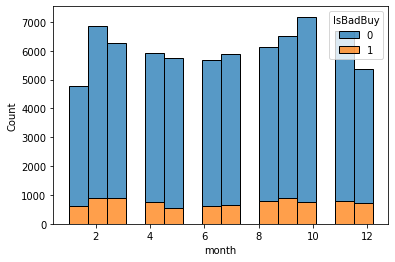

value:  12 bad_buy%:  0.1339418777943368 good_buy%:  0.8660581222056631
value:  1 bad_buy%:  0.13228511530398324 good_buy%:  0.8677148846960168
value:  2 bad_buy%:  0.1301359847930984 good_buy%:  0.8698640152069016
value:  3 bad_buy%:  0.14447818443343455 good_buy%:  0.8555218155665655
value:  4 bad_buy%:  0.12586352148272956 good_buy%:  0.8741364785172705
value:  5 bad_buy%:  0.09583333333333334 good_buy%:  0.9041666666666667
value:  6 bad_buy%:  0.11101321585903083 good_buy%:  0.8889867841409692
value:  9 bad_buy%:  0.13886328725038402 good_buy%:  0.861136712749616
value:  10 bad_buy%:  0.10617249547164553 good_buy%:  0.8938275045283545
value:  11 bad_buy%:  0.11865168539325843 good_buy%:  0.8813483146067416
value:  8 bad_buy%:  0.1304772764293859 good_buy%:  0.8695227235706141
value:  7 bad_buy%:  0.10959836623553437 good_buy%:  0.8904016337644656


In [ ]:
sns.histplot(binwidth=0.7, x='month', hue="IsBadBuy", data=train, stat="count", multiple="stack")
plt.savefig(DPATH+'/plots/'+col+'.png')
plt.show()

for value in train['month'].unique():
    df_value = train[train['month'] == value]
    length = df_value.shape[0]
    bad_buy_perc = df_value[df_value['IsBadBuy']==1].shape[0]/length
    print("value: ",value,"bad_buy%: ", bad_buy_perc, "good_buy%: ", 1-bad_buy_perc)

**Observation**


*   few month's % are >=12, its other other variables, no strong support for Bad buy




<h2>Let's observe VehOdo - The vehicles odometer reading Feature</h2>


*   It is not clear whether it is from vehicle manufactured year or vehicle purchased year
*   In any case, it has to be standardised in terms of no. of years a vehicle had been used.




In [ ]:
train['VehOdo'].min(), train['VehOdo'].max(), train['VehOdo'].mean()


(4825, 115717, 71499.98912045601)

In [ ]:
train['VehOdo'] = train['VehOdo']/train['VehicleAge']

In [ ]:
train['VehOdo'].min(), train['VehOdo'].max(), train['VehOdo'].mean()

(894.6666666666666, 103373.0, 20454.38637739059)

<h1>Derived feature 3</h1>


*   **WarrantyCost %**, we can get the % cost of warranty, it might give a represent the auctioner's confidence about the car's quality. 



In [ ]:
train['WC_Perc'] = train['VehBCost']/(train['WarrantyCost']/3)

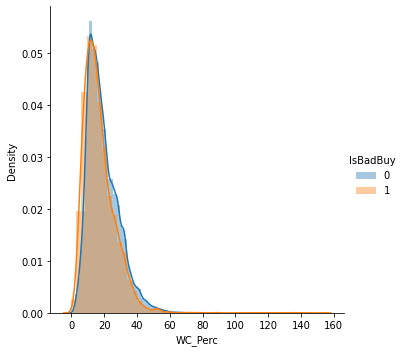

In [ ]:
sns.FacetGrid(train, hue="IsBadBuy", size=5).map(sns.distplot, 'WC_Perc').add_legend();
plt.savefig(DPATH+'/plots/WC_Perc.png')
plt.show();

**Observation**

*   Equally distributed across target values


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72981 entries, 0 to 72982
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   RefId                              72981 non-null  int64         
 1   IsBadBuy                           72981 non-null  int64         
 2   PurchDate                          72981 non-null  datetime64[ns]
 3   Auction                            72981 non-null  object        
 4   VehYear                            72981 non-null  int64         
 5   VehicleAge                         72981 non-null  int64         
 6   Make                               72981 non-null  object        
 7   Model                              72981 non-null  object        
 8   Trim                               72981 non-null  object        
 9   SubModel                           72981 non-null  object        
 10  Color                             

*   We can remove RefId, PurchaseDate
*   With this data at hand, lets move onto modelling



In [ ]:
train.drop(['RefId', 'PurchDate'], axis=1, inplace=True)

In [ ]:
train.shape

(72981, 35)

In [ ]:
train.to_csv(DPATH+'train_preprocess.csv', index=False)

<h1>Preparing test data</h1>

In [ ]:
test.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920


In [ ]:
#Replaces null values with mean, mode 
test = data_cleaning(test)

In [ ]:
test.isna().sum()

RefId                                0
PurchDate                            0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelTypeID                          0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
PRIMEUNIT                

In [ ]:
import numpy as np
np.isinf(test['VehOdo']).values.sum()

0

In [ ]:
test.loc[test.Transmission == 'Manual', 'Transmission'] = 'MANUAL'

In [ ]:
test['Transmission'].value_counts()

AUTO      47013
MANUAL     1694
Name: Transmission, dtype: int64

In [ ]:
print(train[train.MMRAcquisitionAuctionAveragePrice <= 0.0].shape)
print(train[train.MMRAcquisitionAuctionAveragePrice <= 1.0].shape)

(0, 35)
(0, 35)


In [ ]:
test = data_cleaning_price(test)

In [ ]:
test['quality'] = test.apply (lambda row: quality(row), axis=1)

In [ ]:
test['PurchDate'] = pd.to_datetime(test['PurchDate'])
(test['VehicleAge'] == test['PurchDate'].dt.year - test['VehYear']).value_counts()

True     48704
False        3
dtype: int64

In [ ]:
test[test['VehicleAge'] != test['PurchDate'].dt.year - test['VehYear']][['RefId', 'PurchDate', 'VehYear', 'VehicleAge']]

,RefId,PurchDate,VehYear,VehicleAge
11078,84097,2009-08-13,2006,4
26421,99448,2009-12-08,2005,5
36139,109170,2009-10-14,2004,6


In [ ]:
test['VehicleAge'] = test['PurchDate'].dt.year - test['VehYear']

In [ ]:
test['VehicleAge'].value_counts()

4    11335
3    10728
5     8633
2     5909
6     5296
7     3248
8     1601
1     1504
9      445
0        8
Name: VehicleAge, dtype: int64

In [ ]:
test[test.VehicleAge == 0] = 1

In [ ]:
test['VehicleAge'].value_counts()

4    11335
3    10728
5     8633
2     5909
6     5296
7     3248
8     1601
1     1512
9      445
Name: VehicleAge, dtype: int64

In [ ]:
test['month'] = test['PurchDate'].dt.month

In [ ]:
test['VehOdo'] = test['VehOdo']/test['VehicleAge']

In [ ]:
test['WC_Perc'] = test['VehBCost']/(test['WarrantyCost']/3)

In [ ]:
test.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,quality,month,WC_Perc
0,73015,2009-12-02,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,21344.250000,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NO,Other,18881,30212,GA,6500.0,0,2152,Above Avg,12,9.061338
1,73016,2009-12-02,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,15468.250000,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NO,Other,18111,30212,GA,6300.0,0,1118,Above Avg,12,16.905188
2,73017,2009-12-02,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,23094.333333,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NO,Other,18111,30212,GA,9700.0,0,1215,Below Avg,12,23.950617
3,73018,2009-12-02,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,12555.571429,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NO,Other,18881,30212,GA,4150.0,0,1933,Above Avg,12,6.440766
4,73019,2009-12-02,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,1.0,Alloy,36716.000000,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NO,Other,18111,30212,GA,4100.0,0,920,Below Avg,12,13.369565


In [ ]:
test.drop(['PurchDate'], axis=1, inplace=True)

In [ ]:
test.to_csv(DPATH+'test_preprocess.csv', index=False)

<h2>All these steps are written into cleaning, preprocess files</h2>

<h1>Data anamolies</h1>

There were many anamolies found

*   nan values for few features
*   Two representations for same value "Manual", "MANUAL"
*   0/1 values for price columns
*   Wrong date value for date column 
*   multiple rows with RefId=1
